In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv('Fraud.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
def replace_type(value):
    if value=='CASH_OUT':
        return 1
    elif value=='PAYMENT':
        return 2
    elif value=='CASH_IN':
        return 3
    elif value=='TRANSFER':
        return 4

In [ ]:
data['type'] = data['type'].apply(replace_type)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2.0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2.0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4.0,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1.0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2.0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Function to convert the first character to its ASCII value and attach it to the rest of the string
def convert_first_char_to_ascii(value):
    if value and isinstance(value, str):
        ascii_value = str(ord(value[0]))
        return ascii_value + value[1:]
    return value


In [ ]:
# Apply the function to the column
data['nameOrig'] = data['nameOrig'].apply(convert_first_char_to_ascii)
data['nameDest'] = data['nameDest'].apply(convert_first_char_to_ascii)


In [ ]:
print(data)

         step  type      amount         nameOrig  oldbalanceOrg  \
0           1   2.0     9839.64  533471231006815      170136.00   
1           1   2.0     1864.28  533471666544295       21249.00   
2           1   4.0      181.00  533471305486145         181.00   
3           1   1.0      181.00   53347840083671         181.00   
4           1   2.0    11668.14  533472048537720       41554.00   
...       ...   ...         ...              ...            ...   
6362615   743   1.0   339682.13   53347786484425      339682.13   
6362616   743   4.0  6311409.28  533471529008245     6311409.28   
6362617   743   1.0  6311409.28  533471162922333     6311409.28   
6362618   743   4.0   850002.52  533471685995037      850002.52   
6362619   743   1.0   850002.52  533471280323807      850002.52   

         newbalanceOrig        nameDest  oldbalanceDest  newbalanceDest  \
0             160296.36  53571979787155            0.00            0.00   
1              19384.72  53572044282225      

In [ ]:
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
data.type.value_counts()

type
1.0    2237500
2.0    2151495
3.0    1399284
4.0     532909
Name: count, dtype: int64

In [ ]:
X=data.drop(['nameOrig', 'isFraud'],axis=1)

In [ ]:
y=data.isFraud

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification
X,y =make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0,n_repeated=0, n_classes=3,  n_clusters_per_class=1, weights=[0.01,0.05,0.94], class_sep=0.8, random_state=0)

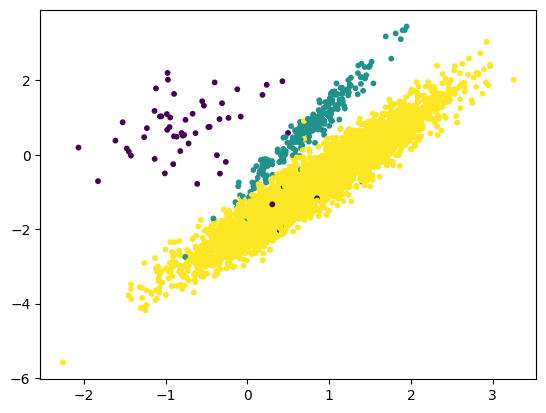

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

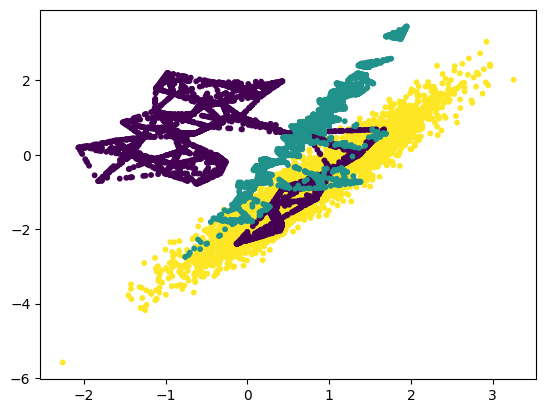

In [ ]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [ ]:
X_resampled, y_resampled = SMOTEENN().fit_resample(X,y)

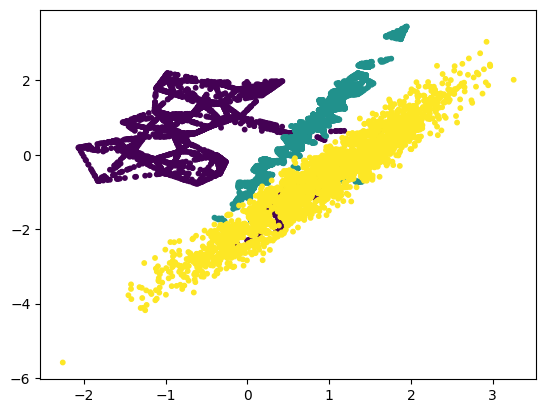

In [ ]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [ ]:
from imblearn.pipeline import make_pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
models=[RandomForestClassifier(),SGDClassifier(),SVC()]
samplers=[SMOTE(),SMOTEENN()]


In [ ]:
model_pipelines=[]
for model in models:
    for sampler in samplers:
        pipeline=make_pipeline(StandardScaler(),sampler,model)
        model_pipelines.append(pipeline)

In [ ]:
model_pipelines

[Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('svc', SVC())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('svc', SVC())])]

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y)

In [ ]:
for pipeline in model_pipelines:
    pipeline.fit(trainX,trainY)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
results = {}

In [ ]:
# Predict on the test data
predictions = pipeline.predict(testX)

In [ ]:
 # Evaluate performance
 report = classification_report(testY, predictions)
 conf_matrix = confusion_matrix(testY, predictions)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.83      0.94      0.88        62
           2       0.99      0.99      0.99      1172

    accuracy                           0.98      1250
   macro avg       0.94      0.91      0.92      1250
weighted avg       0.99      0.98      0.99      1250



In [ ]:
for pipeline in model_pipelines:
    model_name = pipeline.steps[-1][0]  # Get the name of the model
    sampler_name = pipeline.steps[-2][0]  # Get the name of the sampler


In [ ]:
pipeline.fit(trainX, trainY)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                ('svc', SVC())])

In [ ]:
# Predict on the test data
predictions = pipeline.predict(X)

In [ ]:
# Evaluate perfomance
report = classification_report(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

In [ ]:
results[(model_name, sampler_name)] = {
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

In [ ]:
def get_true_positives(Y_true, Y_pred):
    true_positives = sum((Y_true == 1) & (Y_pred == 1))
    return true_positives

def get_true_negatives(Y_true, Y_pred):
    true_negatives = sum((Y_true == 0) & (Y_pred == 0))
    return true_negatives

In [ ]:
for pipeline in model_pipelines:
    pipeline.fit(X,y)
    predictions = pipeline.predict(X)

    tp = get_true_positives(y, predictions)
    tn = get_true_negatives(y, predictions)

In [ ]:
print(f"Model: {pipeline.steps[-1][0]}, Sampler: {pipeline.steps[-2][0]}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print("\n")

Model: svc, Sampler: smoteenn
True Positives: 246
True Negatives: 50




In [ ]:
# calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,predictions)

In [ ]:
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 98.34%
